### Iris Classification with DCSGD
#### 実験の概要
- DC-SGDを用いたIrisの分類
- 訓練データとテストデータに分け、テストデータのLossと精度を確認する。
- モデルは線形ニューラルネットワーク（中間層なし）
- 出力はLog-softmax
- 損失はnegative log-likelihood

#### メモ
- データセットのシャッフルの仕方によって精度、損失の推移は大きく変わる
- いずれにしても　k=1の時の損失,精度が良い
- 1コア内で使えるサンプル数が少なく学習率の設定は重要になりそう。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ML2_lib import DC_SGD
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn import model_selection
from ML2_lib import models

In [2]:
hoge = DC_SGD.DCSGDByTorch(lr=3)

In [3]:
real_data = load_iris()
x = real_data.data

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# x = x.T


In [4]:
y = real_data.target
y = y.T

data_train, data_test, label_train, label_test = model_selection.train_test_split(x, y)

model = models.LinearClassification(4,3)
lppl = hoge.learn(k=3,x=data_train,y=label_train,model=model)


In [5]:
hoge.predict(data_test,label_test)


予測
tensor([0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0,
        2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2])
答え
tensor([0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0,
        2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2])
正解率
0.9210526315789473


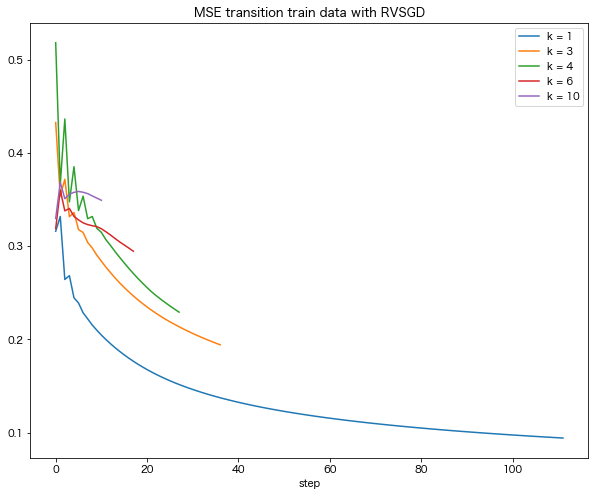

In [6]:
k_list = [1,3,4,6,10]
tr_train_k = hoge.multiple_k_transition(k_list=k_list,train_x=data_train,train_y=label_train,transition_x=data_test,transition_y=label_test,model=model)
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_title("MSE transition train data with RVSGD")
for i in tr_train_k:
    ax1.plot(i)
ax1.set_xlabel("step")
leg = ax1.legend(labels=[f'k = {k}' for k in k_list])
plt.show()

In [7]:

accuracy_list = hoge.multiple_k_accuracy(k_list=k_list,train_x=data_train,train_y=label_train,transition_x=data_test,transition_y=label_test,model=model)

In [8]:
# 最終的なMSE(テストデータ)
df = pd.DataFrame(np.array(accuracy_list).reshape(1,-1),columns=k_list,index=["accuracy"])
df

,1,3,4,6,10
accuracy,0.973684,0.921053,0.894737,0.842105,0.842105
